In [3]:
import scipy
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from itertools import combinations
import time
import random
from scipy.stats import beta
import pandas as pd
import copy
%matplotlib inline

## Mathmatic Functions

In [4]:
# centers the opinion vector around 0
def mean_center(op, n1):
    ones = np.ones((n1, 1))
    x = op - (np.dot(np.transpose(op),ones)/n1) * ones
    return x

# compute number of edges, m
def num_edges(La, n):
    m = 0
    for i in range(n):
        for j in range(n):
            if i > j and La[i,j] < 0:
                m += 1            
    return m


In [5]:
# # maximizing polarization only: \bar{z}^T \bar{z}   
def obj_polarization(G1, s1, s2, n1):
    np.set_printoptions(precision=5)
    z1 = equilibrium(n1,s1, g, h, G1, beta,gamma)
#     z = np.concatenate((z1,s2))
    op_mean = mean_center(z1, n1)
    return np.dot(np.transpose(op_mean), op_mean)[0,0] 

In [6]:
# Calculate innate polarization
def obj_innate_polarization(op, n):  
    np.set_printoptions(precision=5)
    op_mean = mean_center(op, n)
    return np.dot(np.transpose(op_mean), op_mean)[0,0]



In [364]:
# Parameters for the network
# n = 22   # number of nodes in the network
# r = 1/11  # percent of info souce in the network
# n = 10
# r = 1/5
n = 6
r = 1/3
n1 = int(n*(1-r))

np.set_printoptions(precision=3)

## Generating Network
### 1. Make Innate opinion

In [365]:
##create two set of weights connected with density 1) inviduals  2) individual & informaton Source
c1 = np.sort(np.random.choice(n1, n1, replace=False)) #assume (1-r) are individuals
print('c1')
print(c1)
l1 = len(c1)

c1
[0 1 2 3]


In [366]:
def make_innat_opinions(n, c1): #(n1, n2):
    
    # Make list of ind innate opinion to define info source opinion
    innat_s1 = np.random.uniform(low=0.3, high=0.7, size=int(n*(1-r)))    #individual's innate opinion 

    s1 = np.zeros((round((1-r)*n), 1))
    
    idx1 = 0
    for i in range(len(s1)):
        s1[i] = innat_s1[idx1]  #set innate opinion for ind.
        idx1 += 1

    print('s1')
    print(s1)

    # Make info souce opinion
#     h = np.random.uniform(low=max(s1), high=1.0, size=1)
#     g = np.random.uniform(low=0.0, high=min(s1), size=1)
    h = np.eye(1)
    g = np.zeros((1,1))

    s2 = np.concatenate((g, h),axis=0)
#     print('s2')
#     print(s2)

    # Make opinion list of both info source and agents   
    s = np.zeros((n, 1))
    idx1 = 0
    idx2 = 0

    for i in range(len(s)):
        if i in c1:
            s[i] = s1[idx1]
            idx1 += 1
        else:
            s[i] = s2[idx2]
            idx2 += 1    

#     print('s')
#     print(s)

  
    return (s1, h, g, s2, s)

### 2. Make Confirmation Bias Adjacency Matrices

In [367]:
np.set_printoptions(precision=4)

In [368]:
### Prepare for create adjacent matrix
p1 = 1 # density within ind.
p2 = 0 # density of edges between Info Source and Indivisuals

pre_weights1 = scipy.sparse.random(1, int(0.5*l1*(l1 - 1)), density=p1).A[0] 
weights1 = pre_weights1/25


print("weight1")
print(weights1)
# weights1.shape

# b = weights2.round()  #generate a binary array to indicate the connection between ind. and inf. source 
                          #without consider the innate opinions, just based on the edges between info source and ind.


weight1
[0.0307 0.0074 0.0361 0.0179 0.0365 0.0183]


In [369]:
np.set_printoptions(precision=3)

In [418]:
# create n x n adjacency matrix with existing init_G
G1 = np.zeros((n1, n1))
    
## Assign edges between ind to ind 
idx = 0
for i in c1:
    for j in c1:
            if i == j:
                G1[i][j] =0
                continue
            elif i < j:
                G1[i][j] = weights1[idx]
                idx += 1
#                 print(idx)
#                 print (G1[i][j])
            else:
                G1[i][j] = G1[j][i]
print("G for agents completed!")
print(G1)


G for agents completed!
[[0.      0.03069 0.00745 0.03612]
 [0.03069 0.      0.01795 0.03649]
 [0.00745 0.01795 0.      0.0183 ]
 [0.03612 0.03649 0.0183  0.     ]]


### 3. Network Visualization

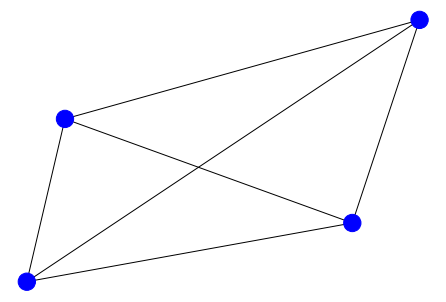

<Figure size 1800x1800 with 0 Axes>

In [371]:
La = scipy.sparse.csgraph.laplacian(G1, normed=False)

nxG = nx.from_numpy_matrix(G1)

color_map = []
for node in nxG:
    if node in c1:
        color_map.append('Blue')
    else: 
        color_map.append('Red')  

#nxG1 = nx.DiGraph(G)
nx.draw(nxG, node_color=color_map, with_labels=False)
plt.figure(figsize=(25, 25))
plt.show()

#### Pure Nash Equilibrium Calculation
$$\beta > \gamma > 0 $$

$$1 - max\left(||W||_{0} , ||W||_{1}\right) >= max\left(2\beta, 4\gamma\right) $$

In [440]:
## calculate Max row sum & column sum of agent' G --> result from beta gamma value

rowsum_ij = np.sum(G1,axis=1)
max_rowsum_ij = max(rowsum_ij)
# print(rowsum_ij)
# print(max_rowsum_ij)
colsum_ij = np.sum(G1, axis=0)
max_colsum_ij = max(colsum_ij)
# print(colsum_ij)
# print(max_colsum_ij)

threshold = 1- max(max_rowsum_ij,max_colsum_ij)
print("Beta reference value less than")
print(threshold/2)
print('Gamma reference value less than')
print(threshold/4)

Beta reference value less than
0.45454704301675175
Gamma reference value less than
0.22727352150837588


#### ---> here to update confirmation bias network

In [472]:
## assumptions: 1) beta > gamma >0    2) 1 - max{rowsum, colsum} >= max{2beta, 4gamma}

gamma = 0.22
beta = 0.45   # the average weight between agents
# check beta gamma are qualify or not
pipi = max(2*beta, 4*gamma)
# print(pipi)

ss = max(max_rowsum_ij, max_colsum_ij)
# print(ss)

xixi = pipi + ss
print("Should be less than 1:")
print (xixi)

Should be less than 1:
0.9909059139664965


In [479]:
# # Test to see if Rowsum and column sum in final G is less than 0 
# rowsum = np.sum(G1,1)
# max_rowsum = max(rowsum)
# print(rowsum)
# print(max_rowsum)
# colsum = np.sum(G1, axis=0)
# max_colsum = max(colsum)
# print(colsum)
# print(max_colsum)

In [474]:
np.set_printoptions(precision=4)
(s1, g, h, s2, s) = make_innat_opinions(n, c1)
op = s1
reset = copy.deepcopy(op)

#Test innate polarization

y = mean_center(s1,n1)
# print(y)
innat_pol = np.dot(np.transpose(y), y)[0,0] 
print('innate_polarization')
print(innat_pol)

s1
[[0.5832]
 [0.4872]
 [0.4527]
 [0.5467]]
innate_polarization
0.010289697471363164


### 4. Equilibrium & Polarization  - based on derivation
$$P(z) = z ^T * z $$


In [475]:
#     ##calculate equlibriua manually (Successful!!!)
def equilibrium(n1,opinion,g,h,G1,beta,gamma): 
    ## Cki are the determinate parameter indicate if info. source influence the agent or not
#     c1i = [1,1,1,1,1,1,1,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1]
#     c2i = [0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]
#     c1i = [1,1,1,1,1,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1]
#     c2i = [0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]
#     c1i = [1,1,0,0,1,1,1,1]
#     c2i = [0,0,1,1,1,1,1,1]
    c1i = [1,0,1,1]
    c2i = [0,1,1,1]
    C1 = np.diag(c1i, k=0)
    C2 = np.diag(c2i, k=0)
    # print(s1)
    R1 = C1*opinion
    R2 = C2*opinion
    I = np.eye(n1)
    Ematrix = I - G1 + gamma*(h*C1 - R1 + R2 - g*C2)
    Ematrix_inverse = np.linalg.inv(Ematrix)
    rowsum = np.sum(G1,1)
    rowsumm_atrix = np.zeros((n1, n1))
    for i in range(n1):
        rowsumm_atrix[i,i] = rowsum[i]
    addMatrix = I - rowsumm_atrix - (C1+C2)*beta + (C1*h - C2*g)*gamma
    A = np.matmul(Ematrix_inverse,addMatrix)
    Vector_A = (c1i*h + c2i*g)*beta + (c2i*g**2-c1i*h**2)*gamma
    # print(np.shape(Vector_A))
    trans_Vector_A = Vector_A.transpose()
    # print(np.shape(trans_Vector_A))
    L = np.matmul(Ematrix_inverse, trans_Vector_A)
    # print(L)
    z1 = np.matmul(A,s1) + L
    
#     print("equilibrium opinion")
#     print(z1)
    return z1

In [476]:
z1 = equilibrium(n1,op,g,h,G1,beta,gamma)

In [477]:
np.set_printoptions(precision=4)

#Test obj_innate_polarization function 
#No Op Change Equilibriua of Stand
z1  = equilibrium(n1, s1, g,h,G1,beta,gamma)
print('check: Equilibrium op should be in interval [0,1]')
print(z1)

y = mean_center(s1,n1)
# print(y)
innat_pol = np.dot(np.transpose(y), y)[0,0] 
print('Innate_polarization:')
print(innat_pol)

# Test equilibrium polarization
equ_pol = obj_polarization(G1, s1, s2, n1)
print('Equilibrium polarization:')
print(equ_pol)

di = innat_pol - equ_pol
print("Difference:")
print(di)
print(z1-s1)

check: Equilibrium op should be in interval [0,1]
[[0.3916]
 [0.9522]
 [0.8082]
 [0.7928]]
Innate_polarization:
0.010289697471363164
Equilibrium polarization:
0.1737944177293717
Difference:
-0.16350472025800855
[[-0.19164]
 [ 0.46493]
 [ 0.35554]
 [ 0.24608]]


#### Perfect Network Generation Above
_________________________________________________________________________________________________________________


In [396]:
np.set_printoptions(precision=4)
print('Innate opinion in the game')
print(op)

Innate opinion in the game
[[0.6082]
 [0.3386]
 [0.3274]
 [0.5293]]


## 4. Maximize & Minimizer's Behavior

###     Maximizer's Choice

Innate greedy algorithm (polarization):

For each $i$ from $1$ to $k$, we choose $v_i$ such that:

$$v_i = argmax_{v \in V - \hat{s}} \max \left(\bar{s}_1^T \bar{s}_1, \bar{s}_0^T \bar{s}_0 \right) $$

In [441]:
# determines if value of opinion at v should be set to 0 or 1 to maximize equilibrium polarization 
def maximize_equi_polarization(op, n1, v):
    
    innat_equi_por = obj_polarization(G1, op, s2, n1)
    temp = op[v, 0]
    por_arr = np.zeros(11)
#     print(por_arr)
    
#     max_opi_option = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
    max_opi_option = [0, 1.0]
    
    # objective if set opinion to 0, 0.1, ..., 1.0
    i = 0
    for new_op in max_opi_option:
#         print('change op to '+ str(i/10))
        
        op[v, 0] = new_op
        por_arr[i] = obj_polarization(G1, op, s2, n1)
#         print(por_arr[i])
        i = i + 1
        op[v, 0] = temp
#     print(por_arr)
    
#     z = equilibrium(n1,s1,g,h,G1,beta,gamma)
    
    
    maxmize_op = np.argmax(por_arr)/10
    max_por = np.max(por_arr)
 
#     print('new_op', 'innat_equi_por', 'max_por')
#     print(maxmize_op, innat_equi_por, max_por)

    return (maxmize_op, innat_equi_por, max_por)

In [398]:
def choose_max_vertex(op, n1, min_touched):
    # iterate over all the vertices that have not yet been changed
    vertices = np.where((op != 0.0) & (op != 1.0))
    # current best vertex, its opinion {0, 1}, "innate" objective, and objective
    
    innat_equi_por = obj_polarization(G1, op, s2, n1)
#     print("innate equi por to compare")
#     print(innat_equi_por)
    
    champion = (None, None, 0, innat_equi_por)

    for v in vertices[0]:
        print('Max start with agent '+ str(v) )
        if v not in min_touched:
            (changed_opinion, innat_equi_por, max_por) = maximize_equi_polarization(op, n1, v)

            if max_por >= champion[3]:
                champion = (v, changed_opinion, innat_equi_por, max_por)

    return (champion)


In [399]:
min_touched = []

In [400]:
max_champion = choose_max_vertex(op, n1, min_touched)
print('v', 'changed_opinion', 'innate_obj', 'obj')
print (max_champion)


Max start with agent 0
Max start with agent 1
Max start with agent 2
Max start with agent 3
v changed_opinion innate_obj obj
(0, 0.0, 0.045841447973116164, 0.3415090115679429)


### Minimizer's Choice


In [401]:
# print('Here s1 and op is not changed Yet')
# print(s1)

# op = s1
# print(op)

In [402]:
# determines if a given vertex should be set to zero or one, all else equal
def minimize_opinion(op, s2, n1, v):
    
    innat_equi_por = obj_polarization(G1, op, s2, n1)
    # save original value of innate opinion
    temp = op[v,0]

    # minimizer's options
    min_opi_option = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
    obj = np.zeros(11)

    # objective if set opinion to 0, 0.1, ..., 1.0
    i = 0
    for new_op in min_opi_option:
        op[v, 0] = new_op
        obj[i] = obj_polarization(G1, op, s2, n1)
#         print('change op to '+ str(i/10))
#         print(obj[i])
        i = i + 1
        # restore original opinion
        op[v, 0] = temp


    minimize_op = np.argmin(obj)/10
    min_pol = np.min(obj)
    
#     print('new_op', 'innat_equi_por', 'min_pol')
#     print(minimize_op, innat_equi_por, min_pol)
    
    # pick the opinion value that yields bigger objective function value
    return (minimize_op, innat_equi_por, min_pol)

In [403]:
def choose_min_vertex(op, n1, max_touched):
    # iterate over all the vertices that have not yet been changed
    vertices = np.where((op != 0.0) & (op != 1.0))
    # current best vertex, its opinion {0, 1}, "innate" objective, and  current best objective

    innat_equi_por = obj_polarization(G1, op, s2, n1)
#     print("innate equi por to compare")
#     print(innat_equi_por)

    champion = (None, None, 0, innat_equi_por)

    for v in vertices[0]:
        if v not in max_touched:
            print('Min start with agent '+ str(v) )
            (minimize_op, innat_equi_por, min_pol) = minimize_opinion(op, s2, n1, v)  

            if min_pol <= champion[3]:
                champion = (v, minimize_op, innat_equi_por, min_pol)

    return (champion)

In [404]:
max_touched = [5]

In [405]:
### use new equilibrium
min_champion = choose_min_vertex(op, n1, max_touched)
print('v', 'changed_opinion', 'innate_obj', 'obj')
print (min_champion)

Min start with agent 0
Min start with agent 1
Min start with agent 2
Min start with agent 3
v changed_opinion innate_obj obj
(0, 0.9, 0.045841447973116164, 0.011771647792129344)


### Testing players' behavior

In [406]:
def random_play(s1,n1):
    
    op = copy.copy(s1)
    max_opi_option = [0, 1.0]
    
    v = random.randint(0,n1-1)
#     print(v)
    new_op = random.randint(0, 1)
#     print(new_op)
    
    # Store old opinion
    old_opinion = op[v,0]
    
    #update the opinion
    op[v,0] = new_op 
#     print('Only 1 opinion changed')
#     print(op)
    print("    "+"Agent" + str(v) +" 's opinion " + str(old_opinion) + " changed to "+ str(new_op))
    por = obj_polarization(G1, op, s2, n1) 
    ### opinion changed ---> find the equilibrium opinion 


    equi = equilibrium(n1,op,g,h,G1,beta,gamma) #Take the equilibrium opinion after maxmizer's operation
    
    
    #restore op
    op[v] = old_opinion
    print("Network reaches equilibrium Polarization: " + str(por))
#     print('Should be restored')
#     print(op)
    return (v, new_op, por)





In [407]:
(v1, max_opinion, max_pol) = random_play(op,n1)
(v2, min_opinion, min_pol) = random_play(op,n1)

    Agent3 's opinion 0.5293461234935296 changed to 0
Network reaches equilibrium Polarization: 0.045841447973116164
    Agent0 's opinion 0.6081938713487507 changed to 1
Network reaches equilibrium Polarization: 0.03770631800056257


In [408]:
def maximizer_play(s1,v2,min_opinion,n1,min_touched): 
    op = copy.copy(s1)
    #update innat opinion 
    op[v2,0] = min_opinion  # Op has been updated by minimizer, so maximizer react to the innate op after that
#     print('Only 1 opinion changed')
#     print(op)
    

    max_champion = choose_max_vertex(op, n1, min_touched) # The best choice among all opinions and vertexs
    (v1, max_opinion, innate_obj, max_pol) = max_champion

    if v1 == None:
        print('Maximizer fail')

    else:
        print("                                ")
        print("Maximizer finds its target agent:")
#         print('v1', 'changed_opinion', 'innate_obj', 'obj')
#         print(max_champion)

        #Store innate_op of the max_selected vertex
        old_opinion_max = op[v1, 0]
        ##### change the agent's opinion
        op[v1,0] = max_opinion
        ## check if agent's opinionis is changed or not
        print("    "+"Agent" + str(v1) +" 's opinion " + str(old_opinion_max) + " changed to "+ str(max_opinion))
#         print("Network reaches equilibrium Polarization: " + str(max_pol))
#         print('2 opinion changed')
#         print(op)

    return(v1, max_opinion, max_pol)

In [409]:
# v2 = 1
# min_opinion = 0
# min_touched =[]
# (v1, max_opinion, max_pol) = maximizer_play(op,v2,min_opinion,n1,min_touched)

In [410]:
####Op has been updated by maximizer, so minimizer react to the innate op after that
def minimizer_play(s1,v1,max_opinion,n1, max_touched): 
    
    op = copy.copy(s1)
    #update innat opinion 
    op[v1,0] = max_opinion
    print('_______________________')
    print('Minimizer Play')
#     print('Only 1 opinion changed')
#     print(op)
    
    min_champion = choose_min_vertex(op, n1, max_touched)
    (v2, min_opinion, innat_equi_por, min_pol) = min_champion
    
    if v2 == None:
        print('Minimizer fail')

    else:
        print("                                ")
        print("Minimizer finds its target agent:")
#         print('v2', 'changed_opinion', 'innate_obj', 'obj')
#         print(v2, min_opinion, innat_equi_por, min_pol)
        #Store innate_op of the min_selected vertex
        old_opinion_min = op[v2,0]
        ##### change the agent's opinion
        op[v2,0] = min_opinion   #-------------------------------------------------> store minimize strategy


        print("    "+"Agent" + str(v2) +" 's opinion " + str(old_opinion_min) + " changed to "+ str(min_opinion))

#         print("Network reaches equilibrium Polarization: " + str(min_pol))
#         print('2 opinion changed')
#         print(op)

    return (v2,min_opinion, min_pol)

In [411]:
min_touched=[]
max_touched=[]
# Game start from maximizer random play
print('Maximizer random selection')
(v1, max_opinion, max_pol) = random_play(op,n1)
max_touched.append(v1)
# print('v1, max_opinion, max_pol')
# print(v1, max_opinion, max_pol)
# store maximizer play history, using agent(row) and changed opinion(column) as indicator to locate history




# Game start from minimizer random play 
print('Minimizer random selection')
(v2, min_opinion, min_pol) = random_play(op,n1)
min_touched.append(v2)



Maximizer random selection
    Agent1 's opinion 0.3385724461986157 changed to 0
Network reaches equilibrium Polarization: 0.050518180589304386
Minimizer random selection
    Agent0 's opinion 0.6081938713487507 changed to 0
Network reaches equilibrium Polarization: 0.05870797277539996


In [412]:

# # # # Testing block to see if player operate properly
# (v1, max_opinion, max_pol) = maximizer_play(s1,v2,min_opinion,n1,min_touched)
# (v2, min_opinion, min_pol) = minimizer_play(s1,v1,max_opinion,n1, max_touched)
# # result =  minimizer_play(max_input, n1)


In [413]:
# Row are Column are depended on min and max's choice: agent v and opinion 
def row_index(v2, min_opinion):
    row = 11*v2 + min_opinion*10 
    return int(row)
def column_index(v1,max_opinion):
    column = 2*v1 + max_opinion
    return int(column)  #the python dataframe index

In [414]:
# row = row_index(1, 0.1)
# print(row)
# column = column_index(1,1)
# print(column)

In [415]:
##create two set of weights connected with density 1) inviduals  2) individual & informaton Source
c1 = np.sort(np.random.choice(n1, n1, replace=False)) #assume (1-r) are individuals
print('c1')
print(c1)
l1 = len(c1)

c1
[0 1 2 3]


In [416]:
# payoff_matrix = np.zeros([11*n1, 2*n1])
# print(payoff_matrix)



# max_opinion = 0
# min_opinion = 0
# # j = row_index(v2, min_opinion)
# # i = column_index(v1,max_opinion)
# op = copy.copy(s1)
# v2 = 0

# for i in range(11*n1): # for each row
#     #for every row, we start with column 1
# #     v1 = 0
# #     if v2 == v1:
# #         v1 = v1 + 1
# #     else:
# #         v1 = v1
    
    
#     i = round(11*v2 + min_opinion*10)
# #     print(11*v2 + min_opinion*10)

#     print('**********')
#     print("At row" + str(i+1))
#     print(min_opinion)
    
#     #update the minimizer's change
#     op = copy.copy(s1)
#     op[v2,0] = min_opinion
#     op1 =  copy.copy(op)
#     min_opinion = round((min_opinion + 0.1), 2)

#     if min_opinion <= 1.0:
#         v2 = v2 
#     else:
#         v2 = v2 + 1
#         min_opinion = 0

# 5. Payoff Matrix and Game

In [417]:
#### Create the payoff matrix for combined strategy, but it take a lot calculation in the game ##
payoff_matrix = np.zeros([11*n1, 2*n1])
print(payoff_matrix)



max_opinion = 0
min_opinion = 0
# j = row_index(v2, min_opinion)
# i = column_index(v1,max_opinion)
op = copy.copy(s1)
v2 = 0


for i in range(11*n1): # for each row
    #for every row, we start with column 1
    v1 = 0
    print(payoff_matrix)
#     print('check v1 v2')
#     print(v1,v2)
        
    if min_opinion <= 1.0:
        v2 = v2 
    else:
        v2 = v2 + 1
        min_opinion = 0
        
    if v2 == v1:
        v1 = v1 + 1
    else:
        v1 = v1
    print('check v1 v2')
    print(v1,v2)
    
       
    i = round(11*v2 + min_opinion*10)
#     print('row index')
    print('**********')
    print("At row" + str(i+1))
    print('min_opinion')
    print(min_opinion)
        
    #update the minimizer's change for next row
    op = copy.copy(s1)
#     print(op)
    op[v2,0] = min_opinion
    op1 =  copy.copy(op)
    min_opinion = round((min_opinion + 0.1), 2)


        
    ### for each column
    for j in range(2*n1):  
        print("_______________________")
        print('v1 v2')
        print(v1,v2)
        if v1==v2:
            v1 = v1+1
            if v1 == n1:
                v1 = 0
        else:
            v1 = v1
            
        j = 2*v1 + max_opinion 
        print('Row' + str(i+1) + ' Column '+ str(j+1))
        print('v1 v2')
        print(v1,v2)

        #update the maximizer's change
#         print(op)
        op1[v1,0] = max_opinion
        print(op1)
        payoff_matrix[i][j] = obj_polarization(G1, op1, s2, n1)
        z = equilibrium(n1,op1,g,h,G1,beta,gamma)
        print(z)
#         print(payoff_matrix)
        
        max_opinion = max_opinion +(-1)**j
#         print('Update max opinion to')
#         print(max_opinion)
#         j = j + 1
        #restore op1 for next loop
        op1 =  copy.copy(op)
        j = j + 1
        
        if j > (2*n1-1):
            print("Start next row >>>>>>>>>>>>>>>")
            v1 = 0
            break
            
        elif j%2:
            v1 = v1
        else:
            v1 = v1 + 1 
            
print(payoff_matrix)
        
        
        


[[0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 

[[0.      0.      0.064   0.05345 0.05871 0.05871 0.05871 0.05871]
 [0.      0.      0.06178 0.05149 0.05659 0.05659 0.05659 0.05659]
 [0.      0.      0.05957 0.04954 0.05447 0.05447 0.05447 0.05447]
 [0.      0.      0.05735 0.04759 0.05235 0.05235 0.05235 0.05235]
 [0.      0.      0.05513 0.04565 0.05023 0.05023 0.05023 0.05023]
 [0.      0.      0.05291 0.04372 0.04812 0.04812 0.04812 0.04812]
 [0.      0.      0.0507  0.04179 0.04601 0.04601 0.04601 0.04601]
 [0.      0.      0.04849 0.03988 0.04392 0.04392 0.04392 0.04392]
 [0.      0.      0.04629 0.03799 0.04183 0.04183 0.04183 0.04183]
 [0.      0.      0.04411 0.03612 0.03976 0.03976 0.03976 0.03976]
 [0.      0.      0.04194 0.03427 0.03771 0.03771 0.03771 0.03771]
 [0.064   0.04194 0.      0.      0.05052 0.05052 0.05052 0.05052]
 [0.06221 0.04048 0.      0.      0.04892 0.04892 0.04892 0.04892]
 [0.06062 0.0392  0.      0.      0.04751 0.04751 0.04751 0.04751]
 [0.      0.      0.      0.      0.      0.      0.      0.  

3 2
[[0.60819]
 [0.33857]
 [0.2    ]
 [1.     ]]
[[0.51762]
 [0.73829]
 [0.66321]
 [0.8057 ]]
Start next row >>>>>>>>>>>>>>>
[[0.      0.      0.064   0.05345 0.05871 0.05871 0.05871 0.05871]
 [0.      0.      0.06178 0.05149 0.05659 0.05659 0.05659 0.05659]
 [0.      0.      0.05957 0.04954 0.05447 0.05447 0.05447 0.05447]
 [0.      0.      0.05735 0.04759 0.05235 0.05235 0.05235 0.05235]
 [0.      0.      0.05513 0.04565 0.05023 0.05023 0.05023 0.05023]
 [0.      0.      0.05291 0.04372 0.04812 0.04812 0.04812 0.04812]
 [0.      0.      0.0507  0.04179 0.04601 0.04601 0.04601 0.04601]
 [0.      0.      0.04849 0.03988 0.04392 0.04392 0.04392 0.04392]
 [0.      0.      0.04629 0.03799 0.04183 0.04183 0.04183 0.04183]
 [0.      0.      0.04411 0.03612 0.03976 0.03976 0.03976 0.03976]
 [0.      0.      0.04194 0.03427 0.03771 0.03771 0.03771 0.03771]
 [0.064   0.04194 0.      0.      0.05052 0.05052 0.05052 0.05052]
 [0.06221 0.04048 0.      0.      0.04892 0.04892 0.04892 0.04892]
 [0.

[[0.51762]
 [0.73829]
 [0.66321]
 [0.8057 ]]
_______________________
v1 v2
2 3
Row37 Column 6
v1 v2
2 3
[[0.60819]
 [0.33857]
 [1.     ]
 [0.3    ]]
[[0.51762]
 [0.73829]
 [0.66321]
 [0.8057 ]]
_______________________
v1 v2
3 3
Row37 Column 1
v1 v2
0 3
[[0.     ]
 [0.33857]
 [0.3274 ]
 [0.3    ]]
[[0.47974]
 [0.73696]
 [0.66283]
 [0.80408]]
_______________________
v1 v2
0 3
Row37 Column 2
v1 v2
0 3
[[1.     ]
 [0.33857]
 [0.3274 ]
 [0.3    ]]
[[0.54536]
 [0.73927]
 [0.66349]
 [0.80689]]
[[0.      0.      0.064   0.05345 0.05871 0.05871 0.05871 0.05871]
 [0.      0.      0.06178 0.05149 0.05659 0.05659 0.05659 0.05659]
 [0.      0.      0.05957 0.04954 0.05447 0.05447 0.05447 0.05447]
 [0.      0.      0.05735 0.04759 0.05235 0.05235 0.05235 0.05235]
 [0.      0.      0.05513 0.04565 0.05023 0.05023 0.05023 0.05023]
 [0.      0.      0.05291 0.04372 0.04812 0.04812 0.04812 0.04812]
 [0.      0.      0.0507  0.04179 0.04601 0.04601 0.04601 0.04601]
 [0.      0.      0.04849 0.03988 0.043

In [361]:
np.set_printoptions(precision=4)
(s1, g, h, s2, s) = make_innat_opinions(n, c1)
op = s1

#Test innate polarization

y = mean_center(s1,n1)
# print(y)
innat_pol = np.dot(np.transpose(y), y)[0,0] 
print('innate_polarization')
print(innat_pol)
print('op')
print(op)
reset = copy.deepcopy(op)

s1
[[0.6234]
 [0.5801]
 [0.5545]
 [0.4874]
 [0.6735]
 [0.4046]
 [0.3555]
 [0.6817]]
innate_polarization
0.10160776663758214
op
[[0.6234]
 [0.5801]
 [0.5545]
 [0.4874]
 [0.6735]
 [0.4046]
 [0.3555]
 [0.6817]]


# Game Start!

In [363]:
max_history = np.zeros([n1, 2])  #agent i * opinion options
# print('max_history')
# print(max_history)

min_history = np.zeros([n1, 11])  #agent i * opinion options
# print('min_history')
# print(min_history)

max_touched = []
min_touched = []
print('min_touched')
print(min_touched)

# Game start from maximizer random play
print('Maximizer random selection')
(v1, max_opinion, max_pol) = random_play(op,n1)
max_touched.append(v1)

# store maximizer play history, using agent(row) and changed opinion(column) as indicator to locate history
max_history[v1,max_opinion] = max_history[v1,max_opinion] +1
print(max_history)
max_frequncy = max_history/1  # its frequency, only played  1 time so far, divided by 1 



# Game start from minimizer random play - make sure two random play are not same agent!!!
print('Minimizer random selection')
(v2, min_opinion, min_pol) = random_play(op,n1)
min_touched.append(v2)

# store minimizer play history
min_history[v2,10*min_opinion] = min_history[v2,10*min_opinion] +1
print(min_history)
min_frequncy = min_history/1  # its frequency 
fla_min_fre = min_frequncy.flatten() 

equi_min = min_pol
equi_max = max_pol
Flag = 0

i = 0
while Flag == 0: 
    i = i + 1
    print("Game " + str(i))
    print("_____________________")
    
#     a = round(equi_min,4)
#     b = round(equi_max,4)
    if max_pol == min_pol:
        print("Reached PURE Nash Equilibrium at game"+ str(i) + " Equi_Por:" + str(max_pol) )
        print('Maximizer')
        print("   changed "+"Agent" + str(v1) +" 's opinion to "+ str(max_opinion))
        print('Minimizer')
        print("   changed "+"Agent" + str(v2) +" 's opinion to "+ str(min_opinion))
        break
        
    elif equi_min == equi_max:
        print("Reached Nash Equilibrium at game"+ str(i) + "and Equi_Por = " + str(equi_min))
        print('max_distribution')
        print(max_frequency)
        print('min_distribution')
        print(min_frequncy)
        Flag = 1
        break
    ############################## maximizer play  
    else:
        (v1, max_opinion, max_pol) = maximizer_play(s1,v2,min_opinion,n1,min_touched)
        max_touched.append(v1)
        print('min_touched')
        print(min_touched)
        print('max_touched')
        print(max_touched)
#         print(v1, max_opinion, max_pol)
        # cumulate strategy 
        max_history[v1,int(max_opinion)] = max_history[v1,int(max_opinion)] +1
#         print('max_history')
#         print(max_history)
        max_frequency = max_history/(i+1)  # its frequency 
#         print('max_distribution')
#         print(max_frequency)
    #     print(i+1) 
        fla_max_fre = max_frequency.flatten() #flaten max_frequncy to calculate average payoff
#         print('fla_max_fre')
#         print(fla_max_fre)

        # create payoff matrix for maxmizer
        row = int(row_index(v2, min_opinion))
        column = int(column_index(v1,max_opinion))

#         print('max_distribution')
#         print(max_frequency)
        max_payoff_vector = payoff_matrix[:,column]
        print(max_payoff_vector)
        #calculate fictitious payoff - equi_max   
        max_payoff_cal = max_payoff_vector * fla_min_fre #payoff * frequency
#         print('max_payoff_vector')
#         print(max_payoff_cal)
        equi_max = np.sum(max_payoff_cal) # add up
    #     print(equi_max)

#         ######################Visualize Maximizer's selection
#         La = scipy.sparse.csgraph.laplacian(G1, normed=False)

#         nxG = nx.from_numpy_matrix(G1)

#         color_map = []
#         for node in nxG:
#             if node == v1:
#                 color_map.append('Red')
#             else: 
#                 color_map.append('Grey')  

#         #nxG1 = nx.DiGraph(G)
#         nx.draw(nxG, node_color=color_map, with_labels=True)
#         plt.figure(figsize=(25, 25))
#         plt.show()
        
        

        ############################### minimizer play
        (v2, min_opinion, min_pol) = minimizer_play(s1,v1,max_opinion,n1, max_touched)
        min_touched.append(v2)
        print('min_touched')
        print(min_touched)
#         print(v2, min_opinion, min_pol)
        min_history[v2,int(10*min_opinion)] = min_history[v2,int(10*min_opinion)] +1
#         print('min_history')
#         print(min_history)
        min_frequncy = min_history/(i+1)  # its frenquency
#         print('min_frequncy')
#         print(min_frequncy)
    #     print(i+1)
        fla_min_fre = min_frequncy.flatten() #flaten max_frequncy to calculate average payoff
#         print('fla_min_fre')
#         print(fla_min_fre)

        # create payoff matrix for minimizer
        row = row_index(v2, min_opinion)
        column = column_index(v1,max_opinion)
    #     print('row, column')
    #     print(row, column)

        #calculate fictitious payoff - equi_min   
    #         print('min_distribution')
    #         print(min_frequncy)
        min_payoff_vector = payoff_matrix[row,:]
        print(min_payoff_vector)
        min_cal = min_payoff_vector * fla_max_fre.transpose() #payoff * frequency
    #         print('min_cal')
    #         print(min_cal)
        equi_min = np.sum(min_cal) # add up
    #     print(equi_min)

        print("Not Reached Nash Equilibrium at Equi_Min = " + str(equi_min) + " and Equi_Max = "+ str(equi_max)) 
#         print('min_distribution')
#         print(min_frequncy)
        
        ######################Visualize Minimizer selection
#         La = scipy.sparse.csgraph.laplacian(G1, normed=False)

#         nxG = nx.from_numpy_matrix(G1)

#         color_map = []
#         for node in nxG:
#             if node == v2:
#                 color_map.append('Blue')
#             else: 
#                 color_map.append('Grey')  

#         #nxG1 = nx.DiGraph(G)
#         nx.draw(nxG, node_color=color_map, with_labels=True)
#         plt.figure(figsize=(25, 25))
#         plt.show()


min_touched
[]
Maximizer random selection
    Agent1 's opinion 0.5800971816771745 changed to 1
Network reaches equilibrium Polarization: 0.14967369785986323
[[0. 0.]
 [0. 1.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]]
Minimizer random selection
    Agent0 's opinion 0.62335765603553 changed to 1
Network reaches equilibrium Polarization: 0.15206340845125785
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
Game 1
_____________________
Max start with agent 1
Max start with agent 2
Max start with agent 3
Max start with agent 4
Max start with agent 5
Max start with agent 6
Max start with agent 7
                                
Maximizer finds its target agent:
    Agent2 's opinion 0.5544859949394374 changed to 0.0
min_touched
[0]
max_touche

In [433]:
## example nan cannot be calcualted in mathmatical function
a = np.nan + 1
print (a)

nan


In [430]:
# Replace 0 with Nan
df = payoff_matrix
df[df==0]= np.nan

In [431]:
print(df)

[[    nan     nan 0.064   0.05345 0.05871 0.05871 0.05871 0.05871]
 [    nan     nan 0.06178 0.05149 0.05659 0.05659 0.05659 0.05659]
 [    nan     nan 0.05957 0.04954 0.05447 0.05447 0.05447 0.05447]
 [    nan     nan 0.05735 0.04759 0.05235 0.05235 0.05235 0.05235]
 [    nan     nan 0.05513 0.04565 0.05023 0.05023 0.05023 0.05023]
 [    nan     nan 0.05291 0.04372 0.04812 0.04812 0.04812 0.04812]
 [    nan     nan 0.0507  0.04179 0.04601 0.04601 0.04601 0.04601]
 [    nan     nan 0.04849 0.03988 0.04392 0.04392 0.04392 0.04392]
 [    nan     nan 0.04629 0.03799 0.04183 0.04183 0.04183 0.04183]
 [    nan     nan 0.04411 0.03612 0.03976 0.03976 0.03976 0.03976]
 [    nan     nan 0.04194 0.03427 0.03771 0.03771 0.03771 0.03771]
 [0.064   0.04194     nan     nan 0.05052 0.05052 0.05052 0.05052]
 [0.06221 0.04048     nan     nan 0.04892 0.04892 0.04892 0.04892]
 [0.06062 0.0392      nan     nan 0.04751 0.04751 0.04751 0.04751]
 [0.05921 0.03809     nan     nan 0.04627 0.04627 0.04627 0.04